## Simple Grid Search

In [15]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [2]:
iris = load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [4]:
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 112 size of test set: 38


In [5]:
best_score = 0

In [6]:
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train, y_train)
        
        #evaluation
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
            

print("Best score: {:.2f}".format(best_score))
print("Best paramenters: {}".format(best_parameters))

Best score: 0.97
Best paramenters: {'C': 100, 'gamma': 0.001}


## The DAnger of Overfitting the Parameters and the Validation Set

In [7]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 84 size of validation set: 28 size of test set: 38



In [8]:
best_score1 = 0

In [9]:
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        #evaluation
        score = svm.score(X_valid, y_valid)
        
        if score > best_score1:
            best_score1 = score
            best_parameters = {'C':C, 'gamma': gamma}

In [10]:
# rebuild a model on the combined training and validation set.
# and evaluate it on test set

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
test_score = svm.score(X_test, y_test)

print("Best score on validation set: {:.2f}".format(best_score1))
print("Best paramenters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best paramenters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

In [18]:
best_score2 = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        
        #perform cross-validation
        scores = cross_val_score(svm,X_trainval, y_trainval, cv=5)
        
        #evaluation
        score = np.mean(scores)
        
        if score > best_score2:
            best_score2 = score
            best_parameters = {'C':C, 'gamma': gamma}

In [19]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Utilizando o módulo GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [22]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [24]:
grid_search.fit(X_train, y_train)

/home/jailsonpereira/anaconda3/envs/events/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [26]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [27]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## Analysing the result of cross-validation

In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import mglearn

In [31]:
results = pd.DataFrame(grid_search.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000732,0.000135,0.000288,0.000031,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000645,0.000065,0.000282,0.000036,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000587,0.000004,0.000252,0.000002,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000599,0.000033,0.000250,0.000006,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000587,0.000032,0.000242,0.000001,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


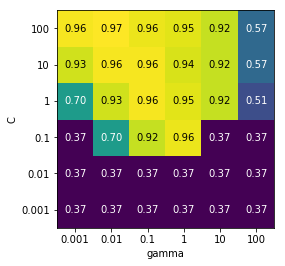

In [33]:
scores = np.array(results.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

## Combinações com lista de dicionários

In [34]:
param_grid = [{'kernel': ['rbf'],'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [35]:
grid_search = GridSearchCV(SVC(),param_grid,cv=5)

In [36]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
print("Best paramenters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best paramenters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


## Grid alinhado

In [38]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),iris.data, iris.target, cv=5)

In [39]:
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.9         0.96666667  1.        ]
Mean cross-validation score:  0.966666666667
